In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

#Prepare data

In [3]:
movies_csv = "https://raw.githubusercontent.com/lukkiddd-tdg/movielens-small/main/movies.csv"
ratings_csv = "https://raw.githubusercontent.com/lukkiddd-tdg/movielens-small/main/ratings.csv"

In [4]:
ratings_df = pd.read_csv(ratings_csv)
ratings_df

,userId,movieId,rating,timestamp
0,1.0,1.0,4.0,964982703
1,1.0,3.0,4.0,964981247
2,1.0,6.0,4.0,964982224
3,1.0,47.0,5.0,964983815
4,1.0,50.0,5.0,964982931
...,...,...,...,...
100831,610.0,166534.0,4.0,1493848402
100832,610.0,168248.0,5.0,1493850091
100833,610.0,168250.0,5.0,1494273047
100834,610.0,168252.0,5.0,1493846352


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     99032 non-null   float64
 1   movieId    100836 non-null  float64
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.1 MB


In [6]:
# Drop Duplicated values
ratings_df = ratings_df.drop_duplicates()

# remove rating >5 and <0
ratings_df = ratings_df[(ratings_df['rating']<=5) & (ratings_df['rating']>0)]

# Drop Nan values
ratings_df = ratings_df.dropna()

# convert type of userId and  movieId from float to int
ratings_df['userId'] = ratings_df['userId'].astype(int)
ratings_df['movieId'] = ratings_df['movieId'].astype(int)

ratings_df["rating"] = ratings_df["rating"].values.astype(np.float32)

ratings_df = ratings_df.reset_index(drop=True)

ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
99027,610,166534,4.0,1493848402
99028,610,168248,5.0,1493850091
99029,610,168250,5.0,1494273047
99030,610,168252,5.0,1493846352


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99032 entries, 0 to 99031
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     99032 non-null  int64  
 1   movieId    99032 non-null  int64  
 2   rating     99032 non-null  float32
 3   timestamp  99032 non-null  int64  
dtypes: float32(1), int64(3)
memory usage: 2.6 MB


#Encode users and movies as integer indices

In [8]:
user_ids = ratings_df["userId"].unique().tolist()
print("User_ids", user_ids)
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
print("Number of user2user_encoded = ",len(user2user_encoded))
print("user2user_encoded = ",user2user_encoded)
print("Number of userencoded2user = ", len(user_encoded2user))
print("userencoded2user = ", user_encoded2user)

print("\n")

movie_ids = ratings_df["movieId"].unique().tolist()
print("Movie_ids", movie_ids)
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
print("Number of movie2movie_encoded = ",len(movie2movie_encoded))
print("movie2movie_encoded = ",movie2movie_encoded)
print("Number of movie_encoded2movie = ", len(movie_encoded2movie))
print("movie_encoded2movie = ", movie_encoded2movie)

ratings_df["user"] = ratings_df["userId"].map(user2user_encoded)
ratings_df["movie"] = ratings_df["movieId"].map(movie2movie_encoded)

User_ids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228

In [9]:
ratings_df

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,1
2,1,6,4.0,964982224,0,2
3,1,47,5.0,964983815,0,3
4,1,50,5.0,964982931,0,4
...,...,...,...,...,...,...
99027,610,166534,4.0,1493848402,589,3088
99028,610,168248,5.0,1493850091,589,2016
99029,610,168250,5.0,1494273047,589,3089
99030,610,168252,5.0,1493846352,589,1369


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99032 entries, 0 to 99031
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     99032 non-null  int64  
 1   movieId    99032 non-null  int64  
 2   rating     99032 non-null  float32
 3   timestamp  99032 non-null  int64  
 4   user       99032 non-null  int64  
 5   movie      99032 non-null  int64  
dtypes: float32(1), int64(5)
memory usage: 4.2 MB


#Prepare training and validation data

In [11]:
ratings_df = ratings_df.sample(frac=1, random_state=42)
x = ratings_df[["user", "movie"]].values

# Normalize the targets between 0 and 1. Makes it easy to train.
min_rating = min(ratings_df["rating"])
max_rating = max(ratings_df["rating"])
y = ratings_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * ratings_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

#Create the model

In [12]:
EMBEDDING_SIZE = 50

# @keras.saving.register_keras_serializable(package="MyLayers")
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to be between 0 and 11
        return tf.nn.sigmoid(x)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [20]:
model.summary()

Model: "recommender_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  29500     
                                                                 
 embedding_1 (Embedding)     multiple                  590       
                                                                 
 embedding_2 (Embedding)     multiple                  484800    
                                                                 
 embedding_3 (Embedding)     multiple                  9696      
                                                                 
Total params: 524586 (2.00 MB)
Trainable params: 524586 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train the model based on the data split

In [13]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1393/1393 [==============================] - 19s 13ms/step - loss: 0.6382 - val_loss: 0.6160
Epoch 2/5
1393/1393 [==============================] - 26s 19ms/step - loss: 0.6145 - val_loss: 0.6145
Epoch 3/5
1393/1393 [==============================] - 17s 12ms/step - loss: 0.6097 - val_loss: 0.6078
Epoch 4/5
1393/1393 [==============================] - 14s 10ms/step - loss: 0.6085 - val_loss: 0.6080
Epoch 5/5
1393/1393 [==============================] - 13s 10ms/step - loss: 0.6087 - val_loss: 0.6081


#Plot training and validation loss

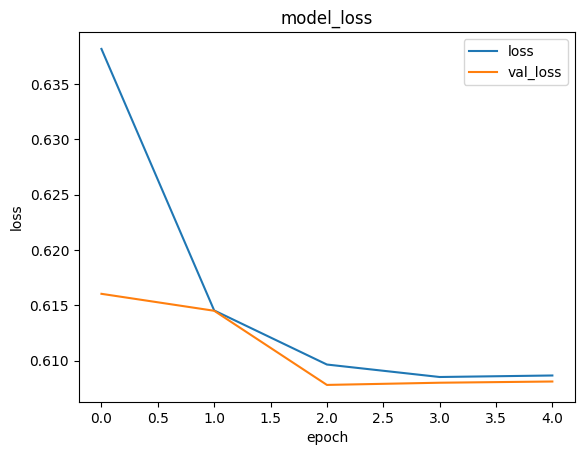

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

#Show top 10 movie recommendations to a user

In [16]:
movie_df = pd.read_csv(movies_csv)
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [17]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [18]:
user_id = 78
movies_watched_by_user = ratings_df[ratings_df.userId == user_id]
movies_not_watched = movie_df[~movie_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']

movies_not_watched = list(set(movies_not_watched).intersection(set(movie2movie_encoded.keys())))

movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]

user_encoder = user2user_encoded.get(user_id)

user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

302/302 [==============================] - 0s 1ms/step


In [19]:
print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

Showing recommendations for user: 78
Movies with high ratings from user
--------------------------------
Terminator 2: Judgment Day (1991) : Action|Sci-Fi
Die Hard (1988) : Action|Crime|Thriller
Terminator, The (1984) : Action|Sci-Fi|Thriller
Matrix, The (1999) : Action|Sci-Fi|Thriller
Airplane! (1980) : Comedy
--------------------------------
Top 10 movie recommendations
--------------------------------
Schindler's List (1993) : Drama|War
Star Wars: Episode V - The Empire Strikes Back (1980) : Action|Adventure|Sci-Fi
Princess Bride, The (1987) : Action|Adventure|Comedy|Fantasy|Romance
Apocalypse Now (1979) : Action|Drama|War
Goodfellas (1990) : Crime|Drama
Godfather: Part II, The (1974) : Crime|Drama
Boot, Das (Boat, The) (1981) : Action|Drama|War
Glory (1989) : Drama|War
Chinatown (1974) : Crime|Film-Noir|Mystery|Thriller
Shining, The (1980) : Horror


# Save and Load model

In [21]:
gdrive_path = "/content/gdrive/MyDrive/Colab Notebooks/"
model_path = gdrive_path + 'recommander_system_model.keras'
model.save(model_path)
print('Model Saved!')

Model Saved!


In [22]:
reconstructed_model = keras.models.load_model(
    model_path,
    custom_objects={"RecommenderNet": RecommenderNet},
)

In [23]:
reconstructed_model.summary()

Model: "recommender_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  29500     
                                                                 
 embedding_5 (Embedding)     multiple                  590       
                                                                 
 embedding_6 (Embedding)     multiple                  484800    
                                                                 
 embedding_7 (Embedding)     multiple                  9696      
                                                                 
Total params: 524586 (2.00 MB)
Trainable params: 524586 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
